In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
link = 'https://drive.google.com/file/d/1eoNt2W-lBdsTq5gbUtLtGIVyrgTLUmvU/view?usp=share_link'

In [ ]:
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head(10)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity


In [ ]:
# name:               Tên của hành tinh theo được cung cấp bởi NASA
# distance:           khoảng cách của hành tinh từ trái đất (light years)
# stellar_magnitude:  Độ sáng của hành tinh, hành tinh càng sáng thì số càng thấp được gán cho hành tinh
# planet_type:        Loại hành tinh, những loại này có nguồn gốc từ các hành tinh trong hệ mặt trời của chúng ta
# discovery_year:     Năm mà hành tinh được phát hiện
# mass_multiplier:    hệ số nhân khối lượng của hành tinh với hành tinh mass_wrt tương ứng
# mass_wrt:           khối lượng của hành tinh so với khối lượng của các hành tinh trong hệ mặt trời của chúng ta
# radius_multiplier:  hệ số nhân bán kính của hành tinh với hành tinh radius_wrt tương ứng
# radius_wrt:         bán kính của hành tinh so với bán kính của các hành tinh trong hệ mặt trời của chúng ta
# orbital_radius:     Bán kính quỹ đạo của các hành tinh quay quanh mặt trời của chúng (in AU)
# orbital_period:     Thời gian tính bằng năm để các hành tinh đó hoàn thành 1 quỹ đạo quanh ngôi sao của chúng (years)
# eccentricity:       độ lệch tâm về cơ bản cho biết đường quỹ đạo là hình tròn như thế nào, độ lệch tâm gần bằng 0 có nghĩa là đường quỹ đạo là một quỹ đạo tròn
# detection_method:   Phương pháp được NASA sử dụng để tìm ngoại hành tinh đó

Data Preprocessing & EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [ ]:
# name

In [ ]:
df['name'].value_counts()

11 Comae Berenices b    1
Kepler-342 c            1
Kepler-341 e            1
Kepler-341 d            1
Kepler-341 c            1
                       ..
K2-85 b                 1
K2-84 c                 1
K2-84 b                 1
K2-83 c                 1
YZ Ceti d               1
Name: name, Length: 5250, dtype: int64

In [ ]:
# distance

In [ ]:
df['distance'].isnull().sum()

17

<AxesSubplot:>

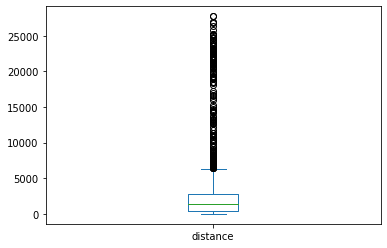

In [ ]:
df['distance'].plot(kind='box')

* 17 dữ liệu bị mất
* cột này có rất nhiều ngoại lệ outliers, nhưng không quá quan trọng vì đó là khoảng cách chính xác của các hành tinh đó so với hệ mặt trời của chúng ta

In [ ]:
# stellar_magnitude

In [ ]:
df['stellar_magnitude'].isnull().sum()

161

<AxesSubplot:>

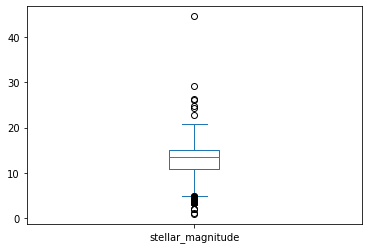

In [ ]:
df['stellar_magnitude'].plot(kind='box')

* 161 dữ liệu bị mất

* Số lượng các hành tinh được NASA tìm thấy hầu hết có stellar_magnitude cao (các hành tinh mờ)

In [ ]:
# planet_type

In [ ]:
df['planet_type'].value_counts()

Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            5
Name: planet_type, dtype: int64

<AxesSubplot:>

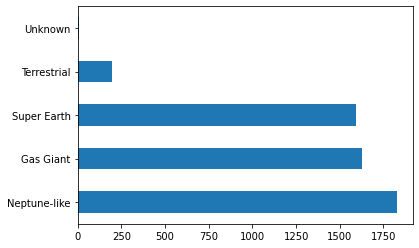

In [ ]:
df['planet_type'].value_counts().plot.barh()

<AxesSubplot:ylabel='planet_type'>

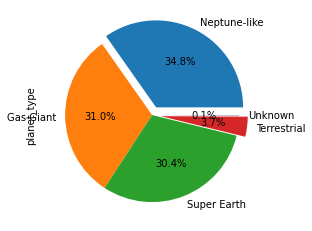

In [ ]:
df['planet_type'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0.1,0,0,0.1,0])

* không có giá trị null, nhưng có 5 hành tinh vẫn chưa xác định được là loại hành tinh gì

* số lượng hành tinh có thể ở được là 1595 (Super Earth)

In [ ]:
# discovery_year

In [ ]:
df['discovery_year'].value_counts()

2016    1517
2014     875
2021     525
2022     338
2018     326
2020     234
2019     203
2015     157
2017     153
2012     138
2011     138
2013     126
2010      97
2009      94
2008      65
2007      52
2005      36
2006      31
2002      29
2004      27
2003      22
2000      16
1999      13
2001      12
2023       9
1996       6
1998       6
1992       2
1995       1
1994       1
1997       1
Name: discovery_year, dtype: int64

In [ ]:
df['discovery_year'].isnull().sum()

0

<AxesSubplot:>

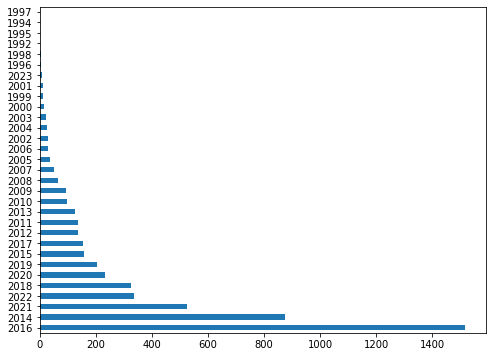

In [ ]:
df['discovery_year'].value_counts().plot(kind='barh', figsize=(8, 6))

* vào năm 2016 số lượng của các hành tinh được phát hiện nhiều nhất (1517)

* không có giá trị null

In [ ]:
# mass_multiplier & mass_wrt

In [ ]:
df['mass_multiplier'].isnull().sum()

23

In [ ]:
df['mass_wrt'].isnull().sum()

23

<AxesSubplot:>

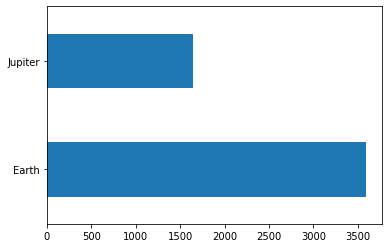

In [ ]:
df['mass_wrt'].value_counts().plot.barh()

<AxesSubplot:>

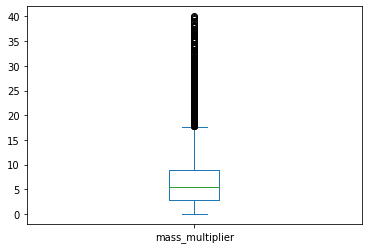

In [ ]:
# so với Earth:
df[df['mass_wrt'] == 'Earth']['mass_multiplier'].plot(kind='box')

<AxesSubplot:>

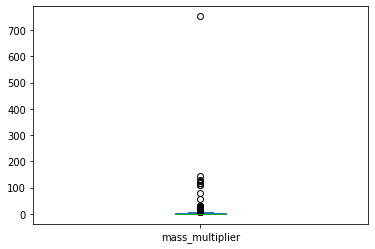

In [ ]:
# so với Jupiter
df[df['mass_wrt'] == 'Jupiter']['mass_multiplier'].plot(kind='box')

=> Có 23 hành tinh ko có số liệu về mass (khối lượng)

Earth

* có nhiều outliers

Jupiter

* có nhiều outliers
* có 1 hành tinh có khối lượng gấp 700 lần Jupiter

In [ ]:
# radius_multiplier & radius_wrt

In [ ]:
df['radius_wrt'].isnull().sum()

17

In [ ]:
df['radius_multiplier'].isnull().sum()

17

<AxesSubplot:>

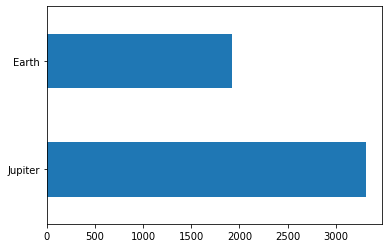

In [ ]:
df['radius_wrt'].value_counts().plot.barh()

<AxesSubplot:>

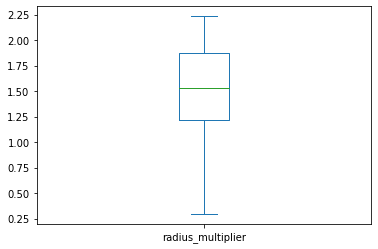

In [ ]:
# so với Earth:
df[df['radius_wrt'] == 'Earth']['radius_multiplier'].plot(kind='box')

<AxesSubplot:>

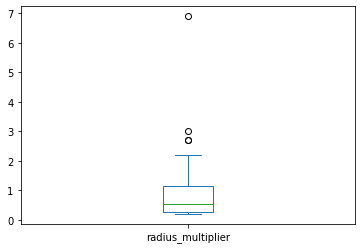

In [ ]:
# so với Jupiter
df[df['radius_wrt'] == 'Jupiter']['radius_multiplier'].plot(kind='box')

=> bán kính của 17 hành tinh bị thiếu

Earth

* không có outliers

Jupiter

* có một vài hành tinh có bán kính outliers
* có 1 hành tinh có kích thước gấp 7 lần Jupiter

In [ ]:
# orbital_radius

In [ ]:
df['orbital_radius'].isnull().sum()

289

<AxesSubplot:>

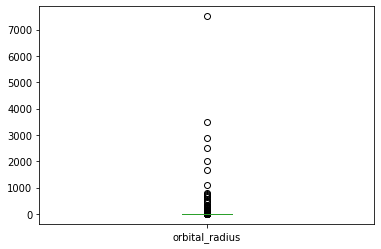

In [ ]:
df['orbital_radius'].plot(kind='box')

* có 289 hành tinh không có dữ liệu quỹ đạo bay

* có một số hành tinh có quỹ đạo bay outliers

* có hành tinh có quỹ đạo bay quanh ngôi sao của nó là lớn hơn 7000 AU

In [ ]:
# orbital_period

In [ ]:
df['orbital_period'].isnull().sum()

0

<AxesSubplot:>

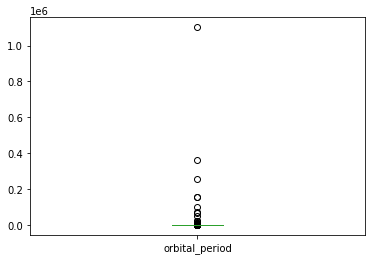

In [ ]:
df['orbital_period'].plot(kind='box')

* không có giá trị null

* có một số hành tinh có thời gian bay hết 1 vòng quỹ đạo outliers

* có một hành tinh mất ~1 triệu năm để hoàn thành một vòng quay xung quanh ngôi sao của nó

In [ ]:
# eccentricity

In [ ]:
df['eccentricity'].isnull().sum()

0

<AxesSubplot:>

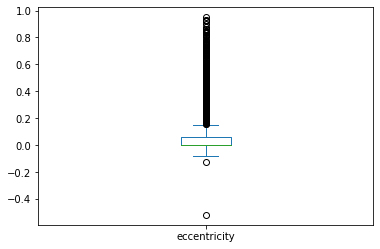

In [ ]:
df['eccentricity'].plot(kind='box')

* các hành tinh có 3 loại quỹ đạo theo độ lệch tâm (eccentricity) đường quỹ đạo của chúng:

  1. Hình tròn: e = 0 or ~0
  2. Hình Parabola: e = 1 or ~1
  3. Hình ellipse: 0 < e < 1
* hầu hết các hành tinh đều có quỹ đạo hình elip
* có 3 hành tinh có độ lệch tâm âm (<0), theo như tìm hiểu thì dấu âm không ảnh hưởng tới hình dạng quỹ đạo của hành tinh đó. Đã so sánh với dữ liệu trên trang chính thống của NASA, dữ liệu của 3 hành tinh không sai.

In [ ]:
# detection_method

In [ ]:
df['detection_method'].isnull().sum()

0

In [ ]:
df['detection_method'].value_counts()

Transit                          3945
Radial Velocity                  1027
Gravitational Microlensing        154
Direct Imaging                     62
Transit Timing Variations          24
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       7
Astrometry                          2
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: detection_method, dtype: int64

<AxesSubplot:>

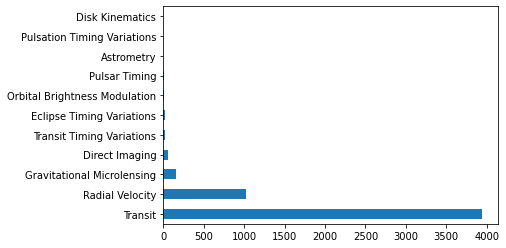

In [ ]:
df['detection_method'].value_counts().plot.barh()

* phương pháp được sử dụng nhiều nhất để tìm ngoại hành tinh là Transit
* không có dữ liệu bị mất

<AxesSubplot:xlabel='distance', ylabel='discovery_year'>

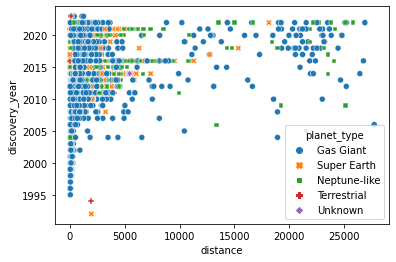

In [ ]:
import seaborn as sns
sns.scatterplot(x = "distance", y = "discovery_year", hue = "planet_type", style = "planet_type",data = df)

**Xứ lý data null**

In [ ]:
df=df.replace("?", np.nan)

In [ ]:
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [ ]:
# drop các biến na vì những dữ liệu này ko thể tự thay thế hoặc dự đoán mà phải có dữ liệu thực tế của các ngoại hành tinh
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4765 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               4765 non-null   object 
 1   distance           4765 non-null   float64
 2   stellar_magnitude  4765 non-null   float64
 3   planet_type        4765 non-null   object 
 4   discovery_year     4765 non-null   int64  
 5   mass_multiplier    4765 non-null   float64
 6   mass_wrt           4765 non-null   object 
 7   radius_multiplier  4765 non-null   float64
 8   radius_wrt         4765 non-null   object 
 9   orbital_radius     4765 non-null   float64
 10  orbital_period     4765 non-null   float64
 11  eccentricity       4765 non-null   float64
 12  detection_method   4765 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 521.2+ KB


**Target: planet_type**

In [ ]:
x = df.drop(['name','discovery_year', 'planet_type','mass_wrt','radius_wrt','detection_method'],axis=1)
data = df[['mass_wrt','radius_wrt','detection_method']]
# mã hóa LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
X_dum = data.apply(LabelEncoder().fit_transform)

X = pd.concat([x,X_dum],axis=1)
y = df['planet_type']

In [ ]:
X

,distance,stellar_magnitude,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,mass_wrt,radius_wrt,detection_method
0,304.0,4.72307,19.40000,1.080,1.290000,0.892539,0.23,1,1,8
1,409.0,5.01300,14.74000,1.090,1.530000,1.400000,0.08,1,1,8
2,246.0,5.23133,4.80000,1.150,0.830000,0.508693,0.00,1,1,8
3,58.0,6.61935,8.13881,1.120,2.773069,4.800000,0.37,1,1,8
4,69.0,6.21500,1.78000,1.200,1.660000,2.200000,0.68,1,1,8
...,...,...,...,...,...,...,...,...,...,...
5245,764.0,10.52100,0.70900,1.373,0.044210,0.007940,0.04,1,1,9
5246,357.0,10.88500,6.30000,1.140,115.000000,1176.500000,0.00,1,1,1
5247,12.0,12.07400,0.70000,0.913,0.016340,0.005476,0.06,0,0,8
5248,12.0,12.07400,1.14000,1.050,0.021560,0.008487,0.00,0,0,8


In [ ]:
y

0         Gas Giant
1         Gas Giant
2         Gas Giant
3         Gas Giant
4         Gas Giant
           ...     
5245      Gas Giant
5246      Gas Giant
5247    Terrestrial
5248    Super Earth
5249    Super Earth
Name: planet_type, Length: 4765, dtype: object

In [ ]:
y.value_counts()

Neptune-like    1670
Super Earth     1477
Gas Giant       1435
Terrestrial      183
Name: planet_type, dtype: int64

**Standardisation**

Dùng Standardisation vì data có nhiều outliers nhưng những outliers này lại là thông tin thực tế, không thể thay đổi và cũng không thể giảm bớt những thông tin này khỏi việc classify các loại hành tinh (như khi dùng Min Max).

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_std = pd.DataFrame(X_std, columns = ["distance",	"stellar_magnitude",	"mass_multiplier",	"radius_multiplier",	"orbital_radius",	"orbital_period",	"eccentricity",
                                "mass_wrt",	"radius_wrt",	"detection_method"])
X_std

,distance,stellar_magnitude,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,mass_wrt,radius_wrt,detection_method
0,-0.823214,-2.529758,0.968934,0.108443,-0.037950,-0.027315,1.118030,1.501593,0.770830,-0.698920
1,-0.765295,-2.437727,0.620950,0.124875,-0.036242,-0.027286,0.085147,1.501593,0.770830,-0.698920
2,-0.855207,-2.368424,-0.121316,0.223470,-0.041224,-0.027337,-0.465724,1.501593,0.770830,-0.698920
3,-0.958910,-1.927832,0.128008,0.174172,-0.027396,-0.027092,2.082054,1.501593,0.770830,-0.698920
4,-0.952842,-2.056182,-0.346834,0.305631,-0.035317,-0.027240,4.216679,1.501593,0.770830,-0.698920
...,...,...,...,...,...,...,...,...,...,...
4760,-0.569474,-0.689350,-0.426810,0.589911,-0.046815,-0.027365,-0.190288,1.501593,0.770830,0.324859
4761,-0.793979,-0.573807,-0.009304,0.207037,0.771228,0.039705,-0.465724,1.501593,0.770830,-7.865372
4762,-0.984284,-0.196389,-0.427482,-0.165977,-0.047014,-0.027365,-0.052570,-0.665959,-1.297303,-0.698920
4763,-0.984284,-0.196389,-0.394625,0.059146,-0.046977,-0.027365,-0.465724,-0.665959,-1.297303,-0.698920


**Train size, test size**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

In [ ]:
pd.DataFrame(X_train, columns = ["distance",	"stellar_magnitude",	"mass_multiplier",	"radius_multiplier",	"orbital_radius",	"orbital_period",	"eccentricity",
                                "mass_wrt",	"radius_wrt",	"detection_method"])

,distance,stellar_magnitude,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity,mass_wrt,radius_wrt,detection_method
398,0.063222,0.397196,-0.435323,0.535684,-0.046792,-0.027365,1.806619,1.501593,0.770830,0.324859
1355,-0.510451,-0.546509,-0.080245,1.899569,-0.046356,-0.027364,-0.465724,-0.665959,-1.297303,0.324859
4063,2.089836,0.806992,-0.466014,-0.363165,-0.045035,-0.027357,-0.465724,1.501593,0.770830,0.324859
4689,-0.628496,-0.032280,-0.320548,0.098584,-0.046838,-0.027365,-0.259147,1.501593,0.770830,0.324859
1971,0.407427,0.053425,-0.296802,0.584981,-0.045952,-0.027362,-0.465724,-0.665959,-1.297303,0.324859
...,...,...,...,...,...,...,...,...,...,...
403,-0.264434,-0.355736,-0.402840,0.133092,-0.046717,-0.027365,0.691105,1.501593,0.770830,0.324859
2332,0.657857,0.458777,-0.312483,0.469955,-0.046063,-0.027362,-0.465724,-0.665959,-1.297303,0.324859
2024,1.036261,0.498772,-0.213166,1.143681,-0.046681,-0.027365,-0.465724,-0.665959,-1.297303,0.324859
2754,-0.503280,1.166317,-0.292321,0.617846,-0.046820,-0.027365,-0.465724,-0.665959,-1.297303,0.324859


In [ ]:
y_train

436        Gas Giant
1482    Neptune-like
4329       Gas Giant
5172       Gas Giant
2198     Super Earth
            ...     
441        Gas Giant
2559     Super Earth
2251     Super Earth
2990     Super Earth
2719     Super Earth
Name: planet_type, Length: 3335, dtype: object

**ML Models**

In [ ]:
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
ModelLR = LogisticRegression(max_iter=200).fit(X_train,y_train)
y_pred_logis = ModelLR.predict(X_test)
print("Accuracy of LR:",accuracy_score(y_test,y_pred_logis))

Accuracy of LR: 0.9552447552447553


Text(0.5, 15.0, 'Predicted label')

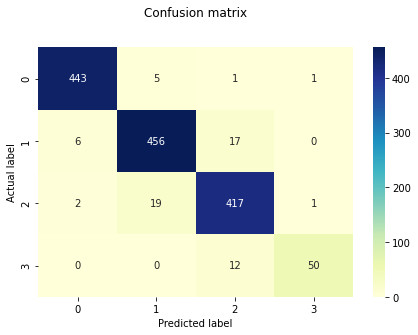

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logis)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy of KNN:",accuracy_score(y_test,y_pred_knn))

Accuracy of KNN: 0.9447552447552447


Text(0.5, 15.0, 'Predicted label')

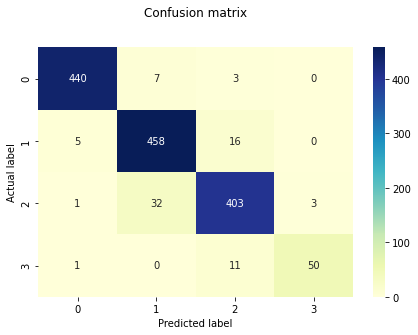

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB().fit(X_train, y_train) # Training mô hình
y_pred_gnb=GNB.predict(X_test)
print("Accuracy of GNB:",accuracy_score(y_test,y_pred_gnb))

Accuracy of GNB: 0.8902097902097902


Text(0.5, 15.0, 'Predicted label')

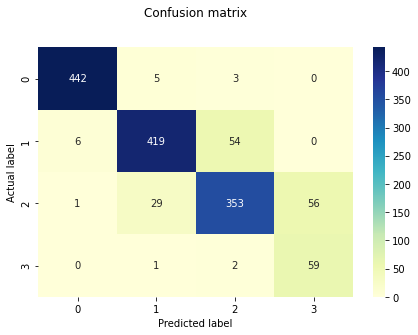

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_gnb)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy of Decision Tree:",accuracy_score(y_test,y_pred_dt))

Accuracy of Decision Tree: 0.9748251748251748


Text(0.5, 15.0, 'Predicted label')

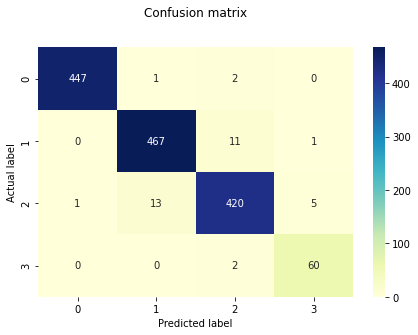

In [ ]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion Matrix:**
- Chạy 4 mô hình: LogisticRegression, K-Near Neighbors, Gaussian Naive Bayes và Decision Tree để phân loại các ngoại hành tinh.
- Trong cả 4 thì Decision Tree có độ chính xác là cao nhất, và có tổng số dự đoán sai là ít nhất so với 3 mô hình còn lại.
- LR và KNN đều có dự đoán sai khá nhiều cho loại hành tinh Neptune-like và Super Earth.
- GNB cũng mắc nhiều sai lầm khi dự đoán 2 hành tinh này nhưng nhiều nhất là Super-Earth.

=> Ta sử dụng mô hình Decision Tree để phân loại các ngoại hành tinh sẽ có độ chính xác cao nhất.


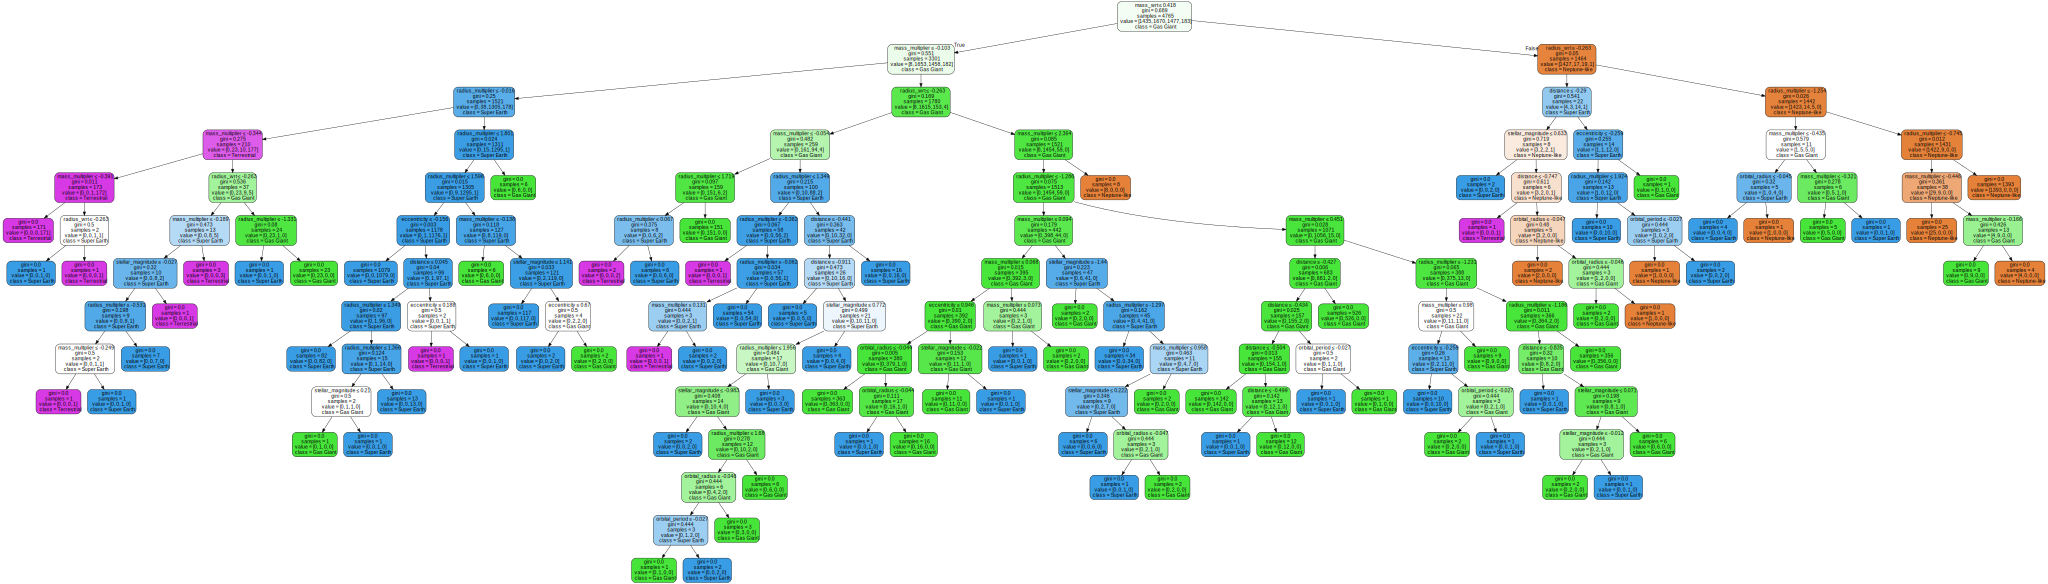

In [ ]:
from sklearn import tree
X, y = X_std, y
model = tree.DecisionTreeClassifier()
model = model.fit(X, y)
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,feature_names=["distance",	"stellar_magnitude",	"mass_multiplier",	"radius_multiplier",	"orbital_radius",	"orbital_period",	"eccentricity",
                                                                    "mass_wrt",	"radius_wrt",	"detection_method"], class_names=["Neptune-like", "Gas Giant", "Super Earth", "Terrestrial"],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.model_selection import cross_val_score

In [ ]:
models = [
    LogisticRegression(max_iter=200),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]
CV = 20
entries = []
i=0
for model in models:
    scores_train = []
    scores_test = []
    times = []
    abs_scores = []
    for j in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()
        d = round((t2 - t1).microseconds/1000,1)
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)

        scores_train.append(score_train)
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d)

    print(model.__class__.__name__, scores_test)
    entries.append([model_name, np.array(scores_train).mean(),
                    np.array(scores_test).mean(), np.array(abs_scores).mean(),
                    np.array(times).mean()])
    i += 1
cv_df = pd.DataFrame(entries,
                     columns=['model_name', 'score_train_mean',
                              'score_test_mean', 'abs|score|', 'time_mean'])

LogisticRegression [0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553, 0.9552447552447553]
KNeighborsClassifier [0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447, 0.9447552447552447]
GaussianNB [0.8902097902097902, 0.8902097902097902, 0.8902097902097902, 0.8902097902097902, 0.8902097902097902, 0.8902097902097902, 0.8902097902097902, 0.8902

In [ ]:
cv_df

,model_name,score_train_mean,score_test_mean,abs|score|,time_mean
0,LogisticRegression,0.958021,0.955245,0.002776,396.940
1,KNeighborsClassifier,0.967316,0.944755,0.022561,22.425
2,GaussianNB,0.884858,0.890210,0.005352,6.175
3,DecisionTreeClassifier,1.000000,0.975140,0.024860,16.200


**Cross-validation:**
- Dùng mô hình GNB sẽ đỡ tốn thời gian hơn nhưng điểm xác thực thấp nhất.
- LR thì quá mất thời gian.
- KNN và Decision có điểm xác thực asb|score| xấp xỉ, nhưng Decision Tree nhanh hơn.


**Conclusion:**
- Trong việc phân loại các loại hành tinh trong tương lai, việc sử dụng mô hình Decision Tree sẽ cho ra kết quả gần đúng nhất và hiệu quả nhất.
- Và việc sử dụng Decision Tree thì dễ dàng phân loại đúng ra loại hành tinh Gas Giants và Terrestrial.
- Để có thể phân loại đúng loại hành tinh Neptune-like và Super Earth thì nên có thêm nhiều các data khác về đặc điểm điển hình của các loại hành tinh này.